# Convergence ot Tc

In [1]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [2]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_path = Path("../../../data/").resolve()
file = 'all_Tc.csv'
df_all_tc = pd.read_csv(os.path.join(data_path,file))

In [5]:
df_all_tc.head()

,nv,P0.5,P1.0,P1.05,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P1.9,P2.0,P2.5,P4,P5,Incert
0,2,1.650080,1.508930,1.488934,1.469946,1.428265,1.394645,1.360791,1.330271,1.298417,1.271128,1.244646,1.218500,1.196846,1.095501,0.945082,0.82504,NaN
1,3,2.522788,1.978686,1.935196,1.892921,1.830096,1.740525,1.674612,1.613994,1.555711,1.503083,1.455246,1.409521,1.364751,1.214908,0.945082,0.82504,NaN
2,4,3.240916,2.349033,2.282810,2.218437,2.114914,1.994955,1.892921,1.800771,1.723341,1.649272,1.583917,1.522574,1.469201,1.248587,0.945082,0.82504,NaN
3,5,3.989909,2.660904,2.570319,2.485476,2.325746,2.189679,2.060552,1.950210,1.846141,1.754529,1.669945,1.596644,1.530485,1.275186,0.945082,0.82504,NaN
4,6,4.559498,2.931842,2.819434,2.713532,2.520381,2.354489,2.196996,2.055190,1.939702,1.832496,1.739543,1.651221,1.576001,1.293508,0.945082,0.82504,NaN


In [6]:
df_exp = df_all_tc.drop(columns=['P0.5','P2.5','P4','P5','Incert'])

In [11]:
df_exp.head()

,nv,P1.0,P1.05,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P1.9,P2.0
0,2,1.508930,1.488934,1.469946,1.428265,1.394645,1.360791,1.330271,1.298417,1.271128,1.244646,1.218500,1.196846
1,3,1.978686,1.935196,1.892921,1.830096,1.740525,1.674612,1.613994,1.555711,1.503083,1.455246,1.409521,1.364751
2,4,2.349033,2.282810,2.218437,2.114914,1.994955,1.892921,1.800771,1.723341,1.649272,1.583917,1.522574,1.469201
3,5,2.660904,2.570319,2.485476,2.325746,2.189679,2.060552,1.950210,1.846141,1.754529,1.669945,1.596644,1.530485
4,6,2.931842,2.819434,2.713532,2.520381,2.354489,2.196996,2.055190,1.939702,1.832496,1.739543,1.651221,1.576001


In [42]:
df_dist = pd.DataFrame()
df_dist['nv'] = df_exp['nv']
columns = list(df_exp.columns.values)
columns.pop(0)
for column in columns:
    df_dist[column] = df_exp[column].map(lambda x: 1/(x - 1/1.19968))

In [43]:
df_dist['1/nv'] = 1/df_dist['nv']

In [44]:
df_dist.head()

,nv,P1.0,P1.05,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P1.9,P2.0,1/nv
0,2,1.480660,1.525837,1.571362,1.681493,1.782248,1.896685,2.013225,2.151178,2.285334,2.432556,2.597776,2.752620,0.500000
1,3,0.873263,0.907737,0.943961,1.003472,1.102573,1.188981,1.281330,1.384744,1.493592,1.608518,1.736215,1.882547,0.333333
2,4,0.659858,0.690010,0.722084,0.780422,0.861030,0.943961,1.033896,1.123866,1.225916,1.332691,1.451339,1.573203,0.250000
3,5,0.547241,0.575784,0.605356,0.670156,0.737396,0.814998,0.895532,0.987571,1.085808,1.195616,1.310464,1.434866,0.200000
4,6,0.476579,0.503555,0.531922,0.592829,0.657491,0.733439,0.818576,0.904039,1.001060,1.103769,1.222994,1.346900,0.166667


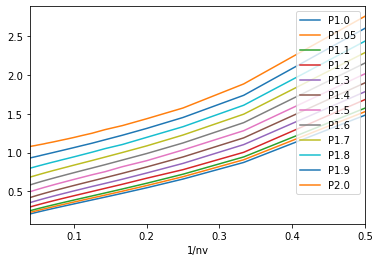

In [45]:
df_dist.plot(x='1/nv',y=columns)